<a href="https://colab.research.google.com/github/PedroDS4/Ajuste_de_curva_RadialBasesFunction/blob/main/Projeto_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4116


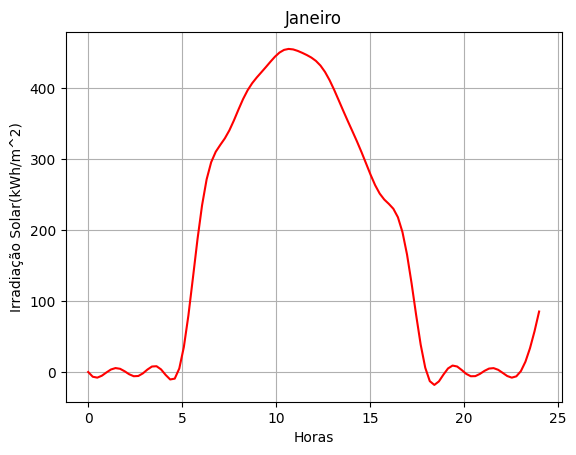

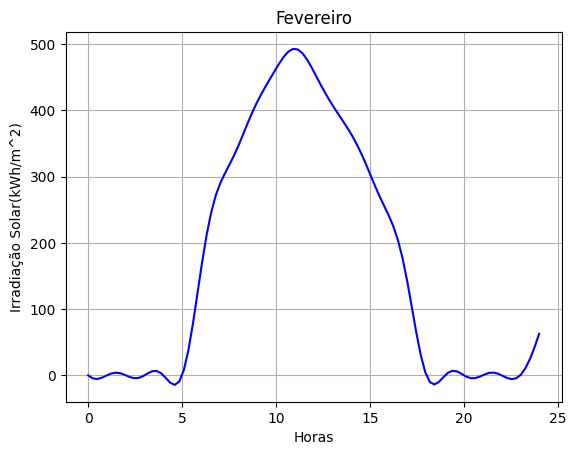

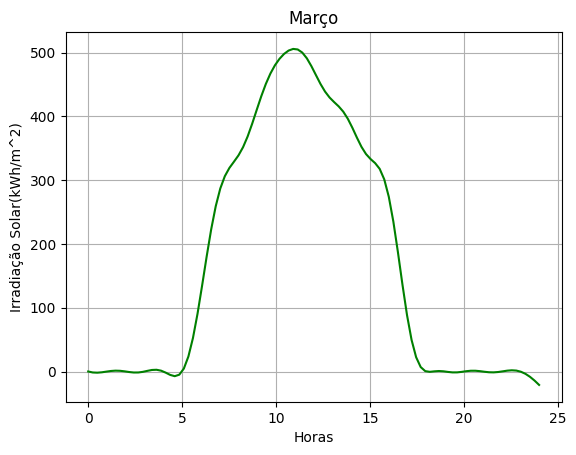

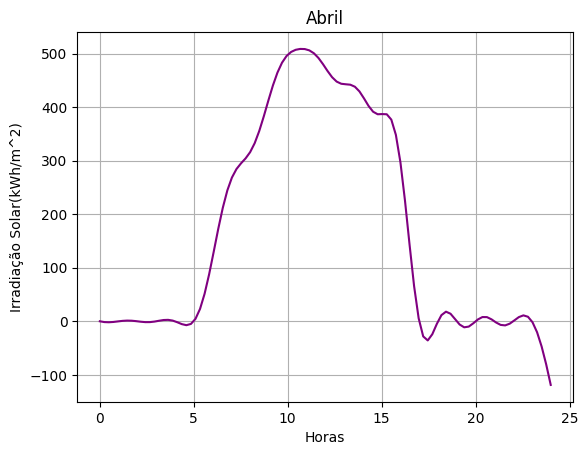

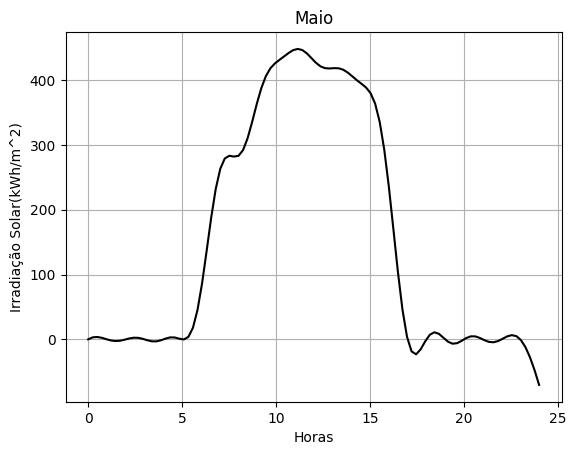

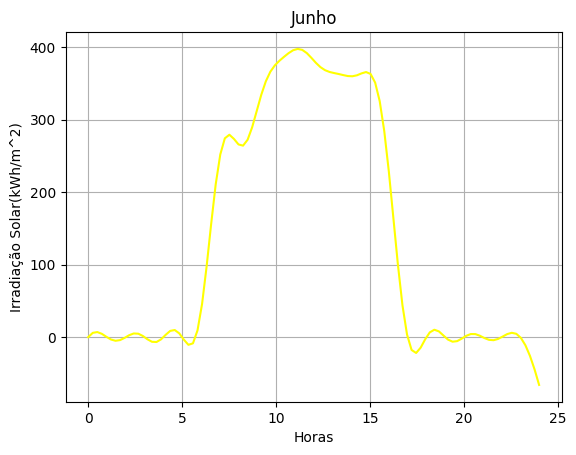

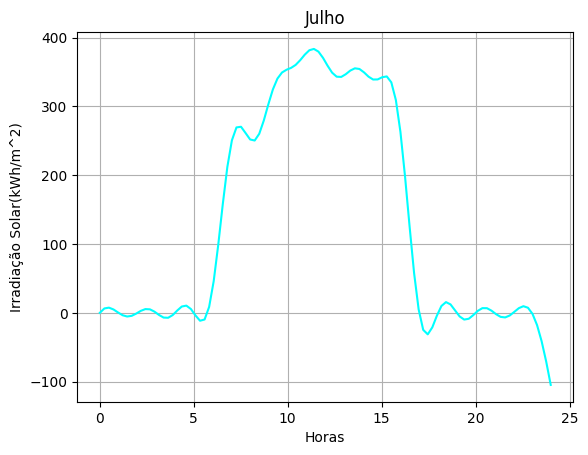

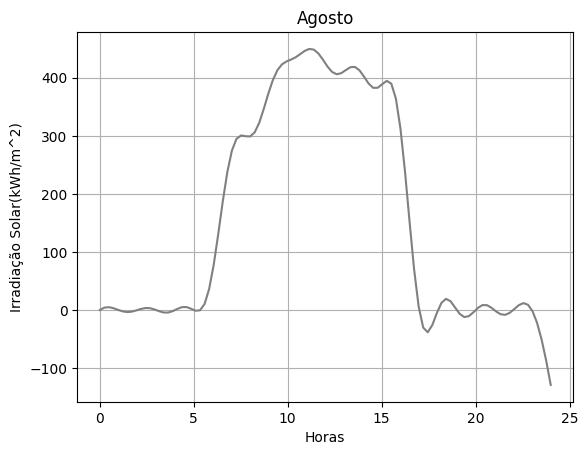

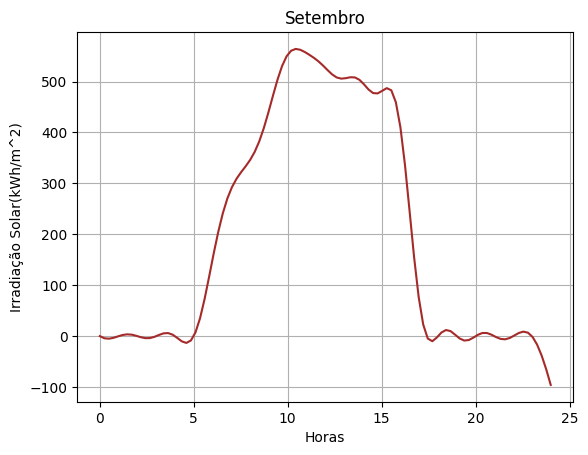

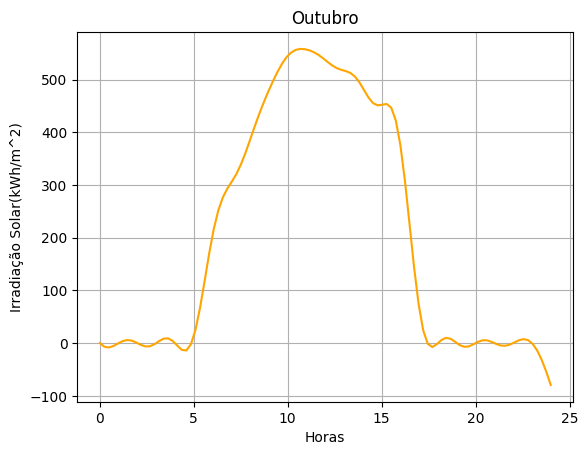

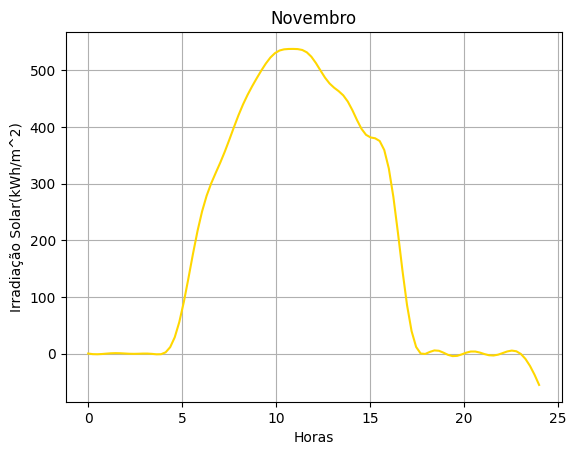

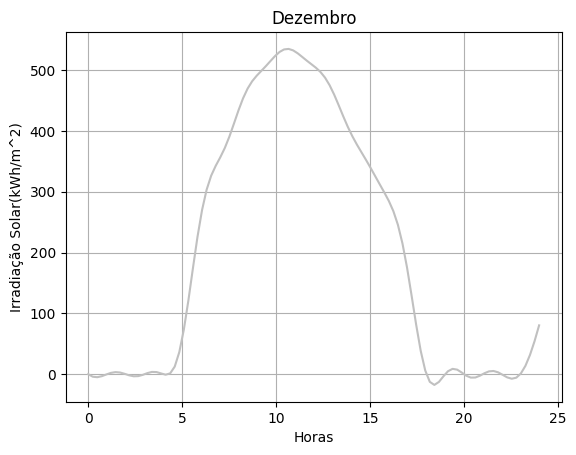

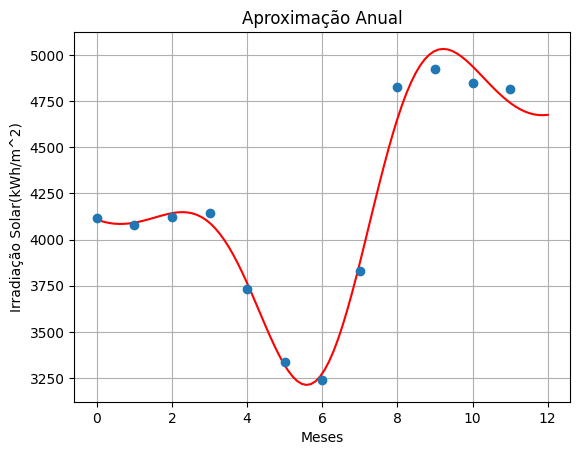

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Cidade Escolhida: Alaotra-Mangoro, Madagascar
#-18.312811°, 048.251953°
#https://globalsolaratlas.info/detail?c=-14.349548,36.650391,4&s=-18.312811,48.251953&m=site


#Dados dos meses
Janeiro = np.array([0,0,0,0,0,22,224,319,370,416,446,454,441,403,343,280,237,161,0,0,0,0,0,0])
Fevereiro = np.array([0,0,0,0,0,0,159,288,347,413,463,493,459,408,364,304,241,139,0,0,0,0,0,0])
Março = np.array([0,0,0,0,0,0,123,284,339,413,483,506,472,425,386,334,274,83,0,0,0,0,0,0])
Abril = np.array([0,0,0,0,0,0,119,266,316,416,498,508,474,443,420,387,297,0,0,0,0,0,0,0])
Maio = np.array([0,0,0,0,0,0,75,260,283,366,427,447,430,418,407,381,236,0,0,0,0,0,0,0])
Junho = np.array([0,0,0,0,0,0,35,248,266,315,377,397,382,365,360,364,229,0,0,0,0,0,0,0])
Julho = np.array([0,0,0,0,0,0,35,247,252,306,354,378,365,345,351,342,263,0,0,0,0,0,0,0])
Agosto = np.array([0,0,0,0,0,0,66,271,299,376,429,448,425,411,405,388,313,0,0,0,0,0,0,0])
Setembro = np.array([0,0,0,0,0,0,151,290,346,443,553,556,527,506,497,481,410,69,0,0,0,0,0,0])
Outubro = np.array([0,0,0,0,0,13,205,305,386,480,545,557,537,517,484,452,375,66,0,0,0,0,0,0])
Novembro = np.array([0,0,0,0,0,77,243,335,421,488,532,538,519,472,434,382,327,79,0,0,0,0,0,0])
Dezembro = np.array([0,0,0,0,0,58,260,355,434,492,525,531,507,466,395,341,285,170,0,0,0,0,0,0])
Meses = np.array([Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro])
NMeses = np.array(['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])
v = np.linspace(0,11,12)
Soma = np.array([4116,4078,4122,4145,3732,3339,3239,3830,4829,4924,4849,4818])
print(sum(Janeiro))
#Definindo as funções de base radial
def Radial(x,u,s):
  y = np.sqrt((1+((((2)*s**-1)*np.fabs(x-u))**2)))
  #y = np.exp((-((2*s**-1)*np.fabs(x-u))**2))
  return y
#Escolhendo os centros das gaussianas
#Mensal
c = np.arange(0,24)
#Anual
c2 = np.arange(0,12,2)
#Eixo do tempo Mensal
Tempo = np.arange(0,24)
#Eixo do tempo Anual
Tempom = np.arange(0,12)



#Escolhendo o valor de epslon(desvio padrão da média)
e = np.std(Tempo)





#Matriz fi
Fi = np.full((len(Janeiro),len(c)),0.4)
Fi2 = np.full((len(Soma),len(c2)),0.4)
def Fun(Tempo,mes,c,Fi):
  for i in range(len(mes)):
    for j in range(len(c)):
      Fi[i][j] = Radial(Tempo[i],c[j],e)
  return Fi
#Matriz Fi do gráfico potencia - horas
Fi = Fun(Tempo,Janeiro,c,Fi)
#Matriz Fi do gráfico potencia - meses
Fi2 = Fun(Tempom,Soma,c2,Fi2)
#Matriz de Gramm
def Matriz_Pesos(F,mes):
 M = np.linalg.inv(np.transpose(F)@F)@(np.transpose(F)@mes)
 return M



#Função genérica aproximada para cada mês
def Fim(x,mes,F,c):
  s = 0
  for i in range(len(c)):
    y = Matriz_Pesos(F,mes)[i]*Radial(x,c[i],e)
    s = s + y
  return s





#Definindo os elementos do gráfico
t = np.linspace(0,24,100)

y = np.linspace(0,24,100)

Color = np.array(["red","blue","green","purple","black","yellow","cyan","gray","brown","orange","gold","silver"])


#Plotagem dos Gráficos dos meses
for j in range(len(Meses)):
  k = 0
  t = np.linspace(0,24,100)
  for i in range(len(y)):
      y[i] = Fim(t[i],Meses[j],Fi,c)

  fig, ax = plt.subplots()
  ax.plot(t,y,Color[j])
  ax.set(xlabel = 'Horas',ylabel = 'Irradiação Solar(kWh/m^2)',title = NMeses[j])
  ax.grid()

#Plotagem do Gráfico Anual
t1 = np.linspace(0,12,100)
y = np.linspace(0,12,100)

for i in range(len(y)):
  y[i] = Fim(t1[i],Soma,Fi2,c2)
fig, bx = plt.subplots()
bx.plot(t1,y,'r')
bx.plot(v,Soma,'o')
bx.set(xlabel = 'Meses',ylabel = 'Irradiação Solar(kWh/m^2)',title = "Aproximação Anual")
bx.grid()



